## Reading the npz for summary data
<a id = top></a>
 - [reading files](#reading)
 - [plotting](#plotting) the alignment
 - Plotting the [spread](#spread) of angles over time
 - [Averaging](#average) the spread from many iterations of experiments
 - Comparing [iterations](#iterations) of alignment

 - [stream](#stream) plots
 - 2D [histograms](#hist) 
 - [all graphs](#all) used together
 - [Final Positions](#final) recreation




In [33]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
plt.style.use("default")

<a id = "reading"></a>
## Reading the data

In [34]:
# dir = "wall implemetation\wall_size_experiment\wall_64"
dir = str(os.getcwd())
filenames = os.listdir(os.getcwd())

wall_lengths = []
folders = []

stream_list_x = []
stream_list_y = []
stream_boundaries = []

## Dictionary for storing the data

def read_summary_file(filepath):
    summary_data = {}
    with open(filepath, 'r') as file:
        for line in file:
            # Split the line into key and value
            key, value = line.strip().split(': ')
            # Store the key-value pair in the dictionary
            summary_data[key] = float(value) if '.' in value or value.isdigit() else value
    return summary_data

simulations = []
def reading_alignment_npz(filenames, simulations, iteration = 0, alignment = True): #, hist = True, stream = True):
    for item in filenames:
        
        
        if item[:7] == "wall128":
            data = {"wall length": 0, "stream": 0, "histogram":0, "angle": 0, "angle_std": 0, "steps": 0, "alignment_average": 0}
            folder = dir + "/" + item
            wall_length = item.split("_")[1]
            data["wall length"] = float(wall_length)

            if alignment:
                ### Loading alignment data
                alignment_data = np.load(folder + f"/alignment_{wall_length}_{iteration}.npz")
                data["angle"] = alignment_data["angles"]
                data["angle_std"] = alignment_data["std"]

            ### Loading summary data
            summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
            summary_data = read_summary_file(summary_file)
            data["steps"] = summary_data['Total number of steps']
            data["alignment_average"] = summary_data['Alignment average steps']
            data["rho"] = summary_data["Density (rho)"]
            data["eta"] = summary_data["Noise/randomness (eta)"]
            data["iteration"] = iteration

            simulations.append(data)
    return simulations

for i in range(6):
    simulations = reading_alignment_npz(filenames, simulations, iteration=i)

len(simulations)

36

In [35]:
simulations[0]

{'wall length': 0.0,
 'stream': 0,
 'histogram': 0,
 'angle': array([ 0.57837283, -2.0973635 , -1.78969857, ..., -1.91713566,
        -1.92966633, -1.93247836]),
 'angle_std': array([ 3.16192296, -2.96926838,  2.81213913, ...,  0.58789425,
         0.59168781,  0.58577108]),
 'steps': 10000.0,
 'alignment_average': 10.0,
 'rho': 1.0,
 'eta': 0.1,
 'iteration': 0}

<a id = "plotting"></a>
[top](#top)
# Plotting the alignment

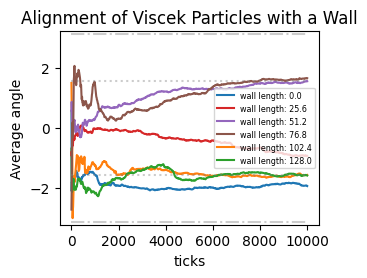

In [36]:
text_width = 8.5/2.54
fig_width = text_width
fig_height = 0.75* fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

lines = []
wall_lengths = []

iteration = 0
for simulation in simulations[6*iteration:6*(1+iteration)]:
    angle = simulation["angle"]
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    rho = simulation["rho"]
    eta = simulation["eta"]

    times = np.arange(0,steps +1, alignment_average_frames)
    line = ax.plot(times, angle, label = f"wall length: {simulation['wall length']:.1f}")[0]
    lines.append(line)
    wall_lengths.append(simulation["wall length"])
# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]

ax.set_ylim(-3.22,3.22)
ax.legend(sorted_lines, sorted_labels, fontsize="xx-small", loc = "center right")
ax.plot([0,times.max()],[-np.pi, -np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Lower angle limit
ax.plot([0,times.max()],[np.pi, np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[np.pi/2, np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[-np.pi/2, -np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.set_xlabel("ticks")
ax.set_ylabel("Average angle")
ax.set_title("Alignment of Viscek Particles with a Wall")

filename = f"alignment_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

<a id = "spread"></a>
[top](#top)
## Spread of angles 

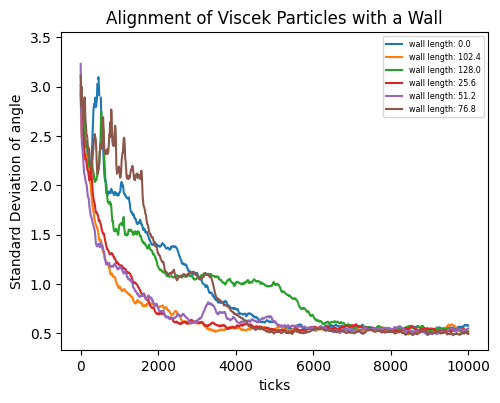

In [37]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75* fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

lines, wall_lengths = [],[]

iteration = 1
for simulation in simulations[6*iteration:6*(1+iteration)]:
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])

    times = np.arange(0,steps +1, alignment_average_frames)
    line = ax.plot(times, std_angles, label = f"wall length: {simulation["wall length"]:.1f}")
    lines.append(line)
    wall_lengths.append(simulation["wall length"])


# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]
rho = simulation["rho"]
ax.legend(fontsize = "xx-small")
ax.set_xlabel("ticks")
# ax.set_xlim(-50,5000)
ax.set_ylabel("Standard Deviation of angle")
ax.set_title("Alignment of Viscek Particles with a Wall")
# ax.set_ylim(0)
filename = f"angle_spread_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

<a id = "average"></a>
[top](#top)
### Averaging the spread
to find the relaxation time

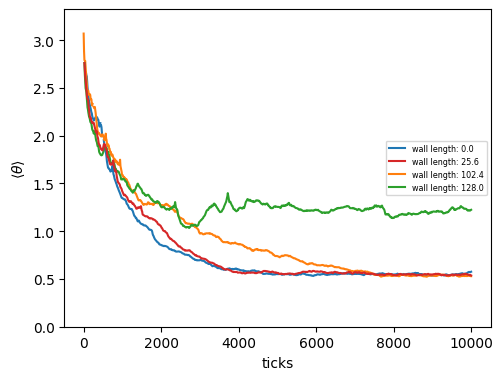

In [38]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75 * fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Dictionary to store std angles for each wall length
wall_std_dict = {}

# Go through all three iterations
for iteration in [0,1,2,3,4,5]:
    for simulation in simulations[6*iteration:6*(1+iteration)]:
        wall_length = simulation["wall length"]
        steps = simulation["steps"]
        alignment_average_frames = simulation["alignment_average"]
        std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
        times = np.arange(0, steps + 1, alignment_average_frames)
        
        # Initialize list for this wall length if not exists
        if wall_length not in wall_std_dict:
            wall_std_dict[wall_length] = []
        
        # Append the std_angles for this iteration
        wall_std_dict[wall_length].append(std_angles)

# Now calculate average std for each wall length
lines = []
wall_lengths = []

for wall_length, std_list in wall_std_dict.items():
    if wall_length in [0.0,25.6, 102.4, 128.0]:
        # Convert to numpy array and calculate mean across iterations
        avg_std = np.mean(std_list, axis=0)
        
        line = ax.plot(times, avg_std, label=f"wall length: {wall_length:.1f}")[0]
        lines.append(line)
        wall_lengths.append(wall_length)

# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]

rho = simulation["rho"]
ax.legend(sorted_lines, sorted_labels, fontsize="xx-small", loc='center right')
ax.set_xlabel("ticks")
# ax.set_ylabel("Average Standard Deviation of angle")
# ax.set_title("Average Spread of Viscek Particles with a Wall")
ax.set_ylabel(r"$\langle \theta \rangle$")
ax.set_ylim(0)

filename = f"average_angle_spread_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

In [39]:
wall_lengths = sorted(wall_lengths)
print(wall_lengths)

[0.0, 25.6, 102.4, 128.0]


<a id = "iterations"></a>

[top](#top)

## Comparing different iterations to each other

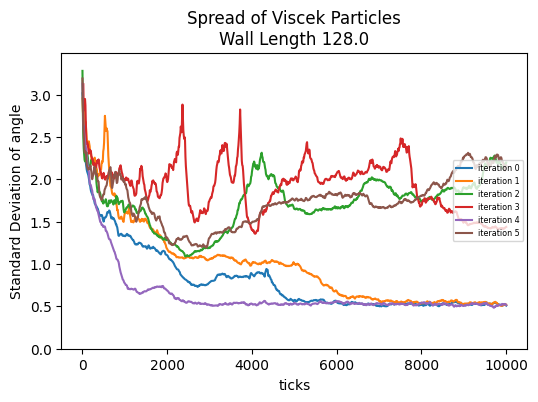

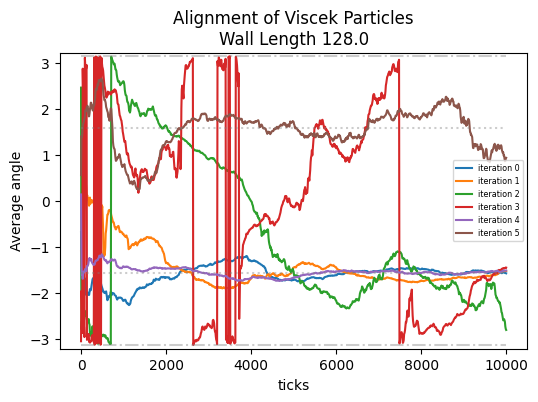

In [40]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75 * fig_width

# First figure - Standard Deviation plot
plt.figure(figsize=(fig_width, fig_height))
wall_length = float(wall_lengths[-1])

for i in range(len(simulations)):
    if simulations[i]["wall length"] == wall_length:
        simulation = simulations[i]
        alignment_average_frames = simulation["alignment_average"]
        
        # Plot standard deviation
        std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
        times = np.arange(0, steps + 1, alignment_average_frames)
        plt.plot(times, std_angles, label=f"iteration {simulation['iteration']}")

rho = simulation["rho"]

# Settings for spread plot
plt.legend(fontsize="xx-small", loc='center right')
plt.xlabel("ticks")
plt.ylabel("Standard Deviation of angle")
plt.title(f"Spread of Viscek Particles\nWall Length {wall_length:.1f}")
plt.ylim(0)
plt.tight_layout()

# Save first figure
filename1 = f"max_wall_length_spread_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath1 = os.path.join(figures_dir, filename1)
# plt.savefig(filepath1, dpi=300, bbox_inches='tight')
plt.show()

# Second figure - Alignment plot
plt.figure(figsize=(fig_width, fig_height))

for i in range(len(simulations)):
    if simulations[i]["wall length"] == wall_length:
        simulation = simulations[i]
        alignment_average_frames = simulation["alignment_average"]
        
        # Plot alignment angle
        angle = simulation["angle"]
        times = np.arange(0, steps + 1, alignment_average_frames)
        plt.plot(times, angle, label=f"iteration {simulation['iteration']}")

# Settings for alignment plot
plt.legend(fontsize="xx-small", loc='center right')
plt.xlabel("ticks")
plt.ylabel("Average angle")
plt.title(f"Alignment of Viscek Particles\nWall Length {wall_length:.1f}")
plt.ylim(-3.22, 3.22)

# Add the horizontal lines for angle limits
plt.plot([0,times.max()],[-np.pi, -np.pi], linestyle="-.", color="grey", alpha=0.4)  # Lower angle limit
plt.plot([0,times.max()],[np.pi, np.pi], linestyle="-.", color="grey", alpha=0.4)    # Upper angle limit
plt.plot([0,times.max()],[np.pi/2, np.pi/2], linestyle="dotted", color="grey", alpha=0.4)  # Upper angle limit
plt.plot([0,times.max()],[-np.pi/2, -np.pi/2], linestyle="dotted", color="grey", alpha=0.4)  # Upper angle limit

plt.tight_layout()

# Save second figure
filename2 = f"max_wall_length_alignment_rho={rho}_{steps}.png"
filepath2 = os.path.join(figures_dir, filename2)
# plt.savefig(filepath2, dpi=300, bbox_inches='tight')
plt.show()

<a id="stream"></a>
[top](#top)
# Stream plots & histograms

2 phases:
- Transient phase: t<=3000
- Steady state phase: t>=5000

for both phases the stream plots and 2D historams can be plotted

In [41]:
def reading_stream_hist_npz(filenames, simulations):
    for item in filenames:
            
            
            if item[:7] == "WALL128":
                data = {"wall length": 0}
                folder = dir + "/" + item
                wall_length = item.split("_")[1]
                data["wall length"] = float(wall_length)

                for phase in ["transient", "steady"]:
                    ### Loading streamplot data
                    stream_data = np.load(folder + f"/{phase}_stream_plot_{wall_length}.npz")
                    stream_x = stream_data["X"]
                    stream_y = stream_data["Y"]
                    stream_boundaries = [stream_x, stream_y]
                    data[f"{phase}_stream"] = [stream_data[stream_data.files[2]],stream_data[stream_data.files[3]]]
                    data["stream_boundaries"] = stream_boundaries
                    
                    ### Loading histogram data
                    histogram_data = np.load(folder + f"/{phase}_histogram_data_{wall_length}.npz")
                    data[f"{phase}_histogram"] = histogram_data["hist"]

                ### Loading summary data
                summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
                summary_data = read_summary_file(summary_file)
                # data["steps"] = summary_data['Total number of steps']
                # data["alignment_average"] = summary_data['Alignment average steps']
                data["rho"] = summary_data["Density (rho)"]
                data["eta"] = summary_data["Noise/randomness (eta)"]
                data["L"] = summary_data["Size of box (L)"]
                # data["iteration"] = iteration

                simulations.append(data)
    return simulations


simulations = reading_stream_hist_npz(os.listdir(os.getcwd()), [])

In [42]:
def plot_x_wall(ax, wall_x, wall_yMin, wall_yMax,wall_color = "blue", walpha = 1, *args, **kwargs):
    """plots the boundary based on the initial dimensions of the wall set.

    Args:
        ax (matplotlib axis): input axis for the wall to be plotted onto

    Returns:
        ax: plot including the wall.
    """

    #plot the wall
    ax.plot([wall_x,wall_x],[wall_yMin,wall_yMax], label = "wall", color = wall_color, alpha = walpha, *args, **kwargs)
    return ax

Transient Phase Stream Plot
Wall Length 0.0


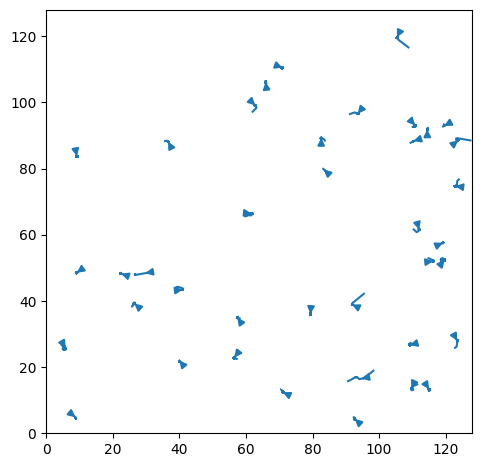

Steady Phase Stream Plot
Wall Length 0.0


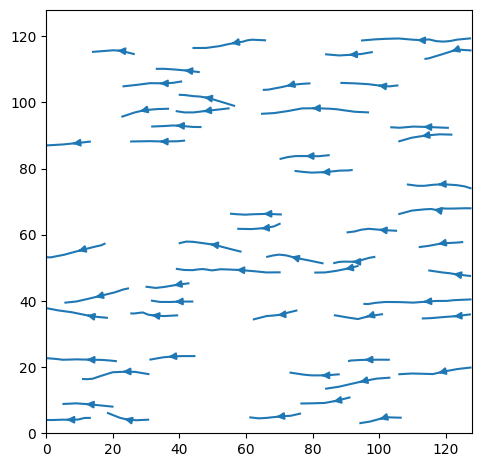

In [43]:
def stream_plot(phase,simulation, ax=None, density = 1):
    valid_phases = ["transient", "steady"]
    if phase not in valid_phases:
        raise ValueError(f"Invalid phase: '{phase}'. Valid options are {valid_phases}.")

    X,Y = simulation["stream_boundaries"]
    _Hx_stream, _Hy_stream = simulation[f"{phase}_stream"]
    if ax==None:
        fig,ax = plt.subplots()
        
    #### STREAM PLOT ##### (currently works on a for loop without the animation)
    wall_colour = "r"
    L = simulation["L"]
    wall_length = simulation["wall length"]
    x_wall = L/2
    wall_yMin = L/2 - wall_length/2
    wall_yMax = L/2 + wall_length/2
    if wall_length !=0: 
        ax = plot_x_wall(ax,x_wall,wall_yMin,wall_yMax,"red")
        ax.legend()
    
    ax.streamplot(X,Y,_Hx_stream,_Hy_stream, density=density)  
    # ax.set_title(f"{phase.title()} Phase Stream Plot\nWall Length {wall_length:.1f}")
    print(f"{phase.title()} Phase Stream Plot\nWall Length {wall_length:.1f}")
    return ax

i = 0
# First figure - Transient state
fig1, ax1 = plt.subplots(figsize=(fig_width, fig_width))
ax1 = stream_plot("transient", simulations[i], ax1, 1)
ax1.set_xlim(0, simulations[i]["L"])
ax1.set_ylim(0, simulations[i]["L"])
plt.show()

# Second figure - Steady state
fig2, ax2 = plt.subplots(figsize=(fig_width, fig_width))
ax2 = stream_plot("steady", simulations[i], ax2, 1)
ax2.set_xlim(0, simulations[i]["L"])
ax2.set_ylim(0, simulations[i]["L"])
plt.show()

In [44]:
simulations[0]["steady_histogram"]

array([[417., 384., 372., ..., 433., 425., 429.],
       [389., 384., 374., ..., 385., 416., 455.],
       [397., 379., 404., ..., 396., 420., 461.],
       ...,
       [395., 392., 395., ..., 420., 403., 356.],
       [387., 406., 370., ..., 424., 409., 350.],
       [399., 373., 388., ..., 378., 436., 386.]], dtype=float16)

I am concerned that the lines are passing through the wall. One idea could be to increase the number of bins in the grid to that similar to the interaction radius of the wall and the alignment.

$r_0 = 0.65$

$r_w$ = $r_0/3$

so having a width of grids to be $\approx 0.5$ would incompass the interactions between the wall and the particles more effectively. Then to reduce the density of the lines on the stream plot there is a density parpameter in `ax.streamplot()`. This issue needs to be solved in `Viscek_wall.py` as that is where the initialisation of the stream plot is.

[top](#top)
<a id = "hist"></a>
### Histograms

fTransient Phase Average Position Histogram
Wall Length 0.0


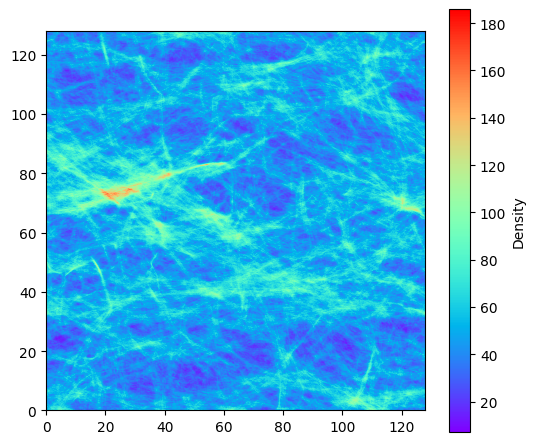

fSteady Phase Average Position Histogram
Wall Length 0.0


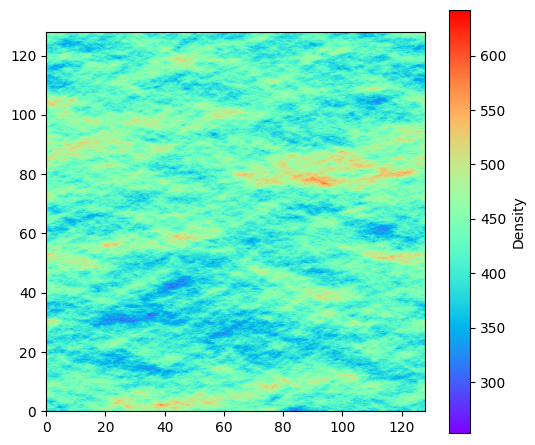

In [45]:
# #### Code below is for in file creation of analysis plots, this can be done when saved using above files.

def hist_2D_plot(phase,simulation,fig = None, ax=None, w_alpha = 1, cmap = "cividis", wall_color = "r", *args, **kwargs):
    valid_phases = ["transient", "steady"]
    if phase not in valid_phases:
        raise ValueError(f"Invalid phase: '{phase}'. Valid options are {valid_phases}.")

    X,Y = simulation["stream_boundaries"]
    hist = simulation[f"{phase}_histogram"].T
    if ax==None:
        fig,ax = plt.subplots()
    
    # Reading data out of the dictionary
    L = simulation["L"]
    wall_length = simulation["wall length"]
    x_wall = L/2
    wall_yMin = L/2 - wall_length/2
    wall_yMax = L/2 + wall_length/2

    # Plotting wall
    if ((wall_length != 0) or (w_alpha ==0)):
        ax = plot_x_wall(ax,x_wall,wall_yMin,wall_yMax,wall_color,w_alpha, *args, **kwargs)
        # ax.legend()

    # Plot Histogram
    cax = ax.imshow(hist, extent=[0, L, 0, L], origin='lower', cmap=cmap, aspect='auto')
    fig.colorbar(cax, ax=ax, label='Density')   # colour bar

    # ax.set_title(f"{phase.title()} Phase Average Position Histogram\nWall Length {wall_length:.1f}")
    print(f"f{phase.title()} Phase Average Position Histogram\nWall Length {wall_length:.1f}")
    return fig,ax

# Adjust figure width to account for colorbar space (approximately 20% of width)
square_size = fig_width * 0.85  # Make the main plot area square
total_height = square_size  # Height equals the square size
i = 0
cmap = "rainbow"

# Get system parameters for zooming
L = simulations[i]["L"]
wall_length = simulations[i]["wall length"]
x_wall = L/2
zoom_distance = wall_length/2 + 5
if wall_length == 0:
    zoom_distance = L/2

# First figure - Transient state
fig1, ax1 = plt.subplots(figsize=(fig_width, total_height))
_, ax1 = hist_2D_plot("transient", simulations[i], fig1, ax1, w_alpha=0.3, cmap=cmap)
ax1.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
ax1.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)
ax1.set_aspect('equal')  # Ensure square aspect ratio
plt.tight_layout()
plt.show()

# Second figure - Steady state
fig2, ax2 = plt.subplots(figsize=(fig_width, total_height))
_, ax2 = hist_2D_plot("steady", simulations[i], fig2, ax2, w_alpha=0.3, cmap=cmap)
ax2.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
ax2.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)
ax2.set_aspect('equal')  # Ensure square aspect ratio
plt.tight_layout()
plt.show()

fTransient Phase Average Position Histogram
Wall Length 25.6


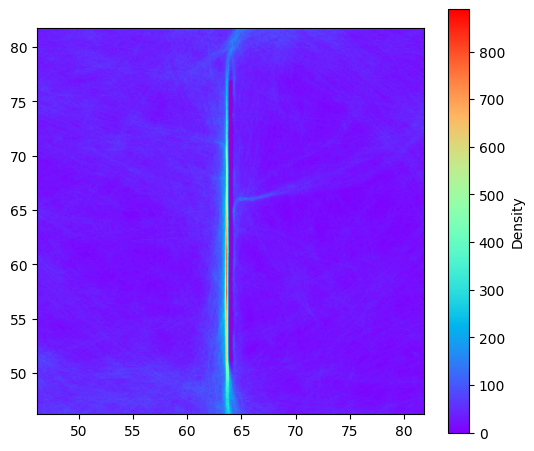

fSteady Phase Average Position Histogram
Wall Length 25.6


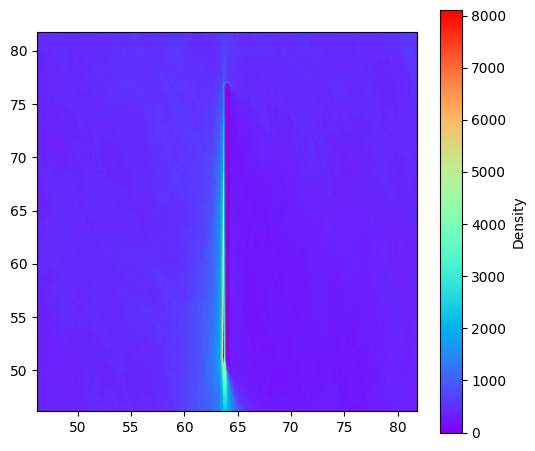

In [46]:
# Adjust figure width to account for colorbar space (approximately 20% of width)
square_size = fig_width * 0.85  # Make the main plot area square
total_height = square_size  # Height equals the square size
i = 2
cmap = "rainbow"

# Get system parameters for zooming
L = simulations[i]["L"]
wall_length = simulations[i]["wall length"]
x_wall = L/2
zoom_distance = wall_length/2 + 5
if wall_length == 0:
    zoom_distance = L/2

# First figure - Transient state
fig1, ax1 = plt.subplots(figsize=(fig_width, total_height))
_, ax1 = hist_2D_plot("transient", simulations[i], fig1, ax1, w_alpha=0.3, cmap=cmap)
ax1.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
ax1.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)
ax1.set_aspect('equal')  # Ensure square aspect ratio
plt.tight_layout()
plt.show()

# Second figure - Steady state
fig2, ax2 = plt.subplots(figsize=(fig_width, total_height))
_, ax2 = hist_2D_plot("steady", simulations[i], fig2, ax2, w_alpha=0.3, cmap=cmap)
ax2.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
ax2.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)
ax2.set_aspect('equal')  # Ensure square aspect ratio
plt.tight_layout()
plt.show()

<a id = all></a>
[top](#top)

## All graphs together

In [47]:
def reading_all(filenames, simulations, dir_starter = "WALL128", iteration = -1): #, hist = True, stream = True):

    if iteration==-1:
        ending = ""
    else:
        ending = f"_{iteration}"

    for item in filenames:        
        if item[:7] == dir_starter:
            data = {"wall length": 0}
            folder = dir + "/" + item
            wall_length = item.split("_")[1]
            data["wall length"] = float(wall_length)

            
            ### Loading alignment data
            alignment_data = np.load(folder + f"/alignment_{wall_length}{ending}.npz")
            data["angle"] = alignment_data["angles"]
            data["angle_std"] = alignment_data["std"]

            for phase in ["transient", "steady"]:
                ### Loading streamplot data
                stream_data = np.load(folder + f"/{phase}_stream_plot_{wall_length}{ending}.npz")
                stream_x = stream_data["X"]
                stream_y = stream_data["Y"]
                stream_boundaries = [stream_x, stream_y]
                data[f"{phase}_stream"] = [stream_data[stream_data.files[2]],stream_data[stream_data.files[3]]]
                data["stream_boundaries"] = stream_boundaries
                
                ### Loading histogram data
                histogram_data = np.load(folder + f"/{phase}_histogram_data_{wall_length}{ending}.npz")
                data[f"{phase}_histogram"] = histogram_data["hist"]

            ### Loading summary data
            summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
            summary_data = read_summary_file(summary_file)
            data["steps"] = summary_data['Total number of steps']
            data["alignment_average"] = summary_data['Alignment average steps']
            data["rho"] = summary_data["Density (rho)"]
            data["eta"] = summary_data["Noise/randomness (eta)"]
            data["L"] = summary_data["Size of box (L)"]

            # Saving final positions & orientations
            try:
                # Attempt to load the final state file
                final_state = np.load(folder + f"/finalstate_{wall_length}{ending}.npz")
                data["final_positions"] = final_state["Positions"]
                data["final_orientations"] = final_state["Orientation"]
            except FileNotFoundError as e:
                # Print the error message and continue execution
                print(f"Error: {e}. Skipping file loading and continuing...")

            simulations.append(data)
    return simulations


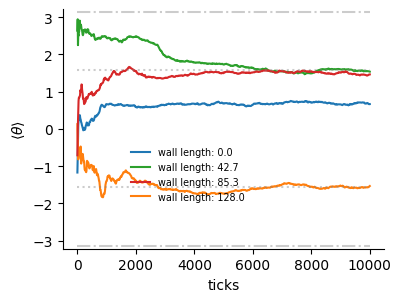

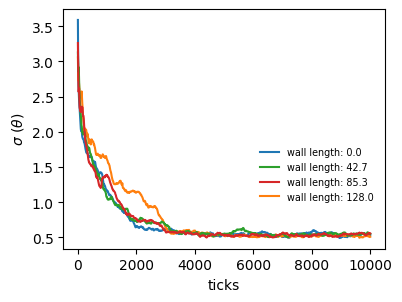

fTransient Phase Average Position Histogram
Wall Length 128.0


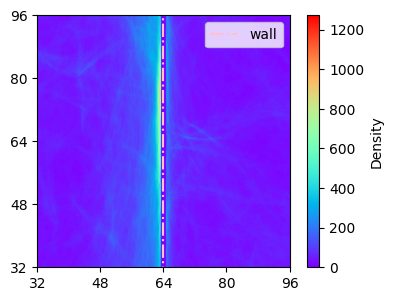

fSteady Phase Average Position Histogram
Wall Length 128.0


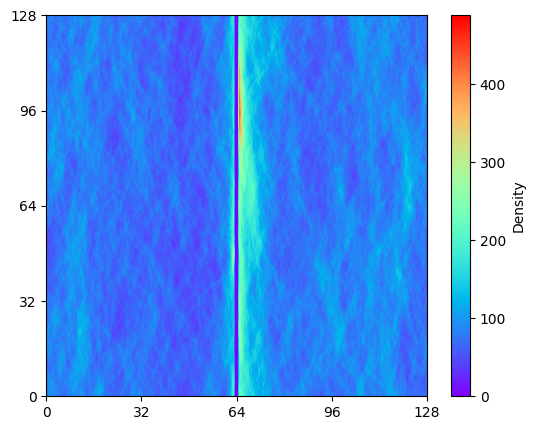

0.2


In [48]:

simulations = reading_all(filenames, [],"test128", iteration= 0)
i = 1

text_width = 5.5
fig_width = text_width
fig_width = fig_width/2 + 1.4
fig_height = 0.75* fig_width 
total_height = 0.75*fig_width

fig, ax = plt.subplots(figsize=(fig_width, fig_height))
fig2,ax2 = plt.subplots(figsize=(fig_width, fig_height))
lines = []
lines2 = []
wall_lengths = []

for simulation in simulations:
    angle = simulation["angle"]
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
    

    times = np.arange(0,steps +1, alignment_average_frames)
    line = ax.plot(times, angle, label = f"wall length: {simulation['wall length']:.1f}")[0]
    line2 = ax2.plot(times, std_angles, label = f"wall length: {simulation["wall length"]:.1f}")
    lines2.append(line2)
    lines.append(line)
    wall_lengths.append(simulation["wall length"])

rho = simulation["rho"]
eta = simulation["eta"]

# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_lines2 = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]

ax.set_ylim(-3.22,3.22)
ax.legend(sorted_lines, sorted_labels, fontsize="x-small", loc = (0.2,0.18), frameon= False)
ax.plot([0,times.max()],[-np.pi, -np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Lower angle limit
ax.plot([0,times.max()],[np.pi, np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[np.pi/2, np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[-np.pi/2, -np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.set_xlabel("ticks")
ax.set_ylabel(r'$\langle \theta \rangle$')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.set_title("Alignment of Viscek Particles with a Wall")



ax2.legend(sorted_lines2, sorted_labels, fontsize = "x-small", frameon=False, loc = (0.6,0.18))
ax2.set_xlabel("ticks")
# ax2.set_xlim(-50,5000)
ax2.set_ylabel(r"$\sigma$ ($\theta$)")
# ax2.set_title("Variation of alignment Viscek Particles with a Wall")


filename = f"alignment_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

# First figure - Transient state
# fig1, ax1 = plt.subplots(figsize=(fig_width, fig_width))
# ax1 = stream_plot("transient", simulations[i], ax1, 1)
# ax1.set_xlim(0, L)
# ax1.set_ylim(0, L)
# plt.show()

# Second figure - Steady state
# fig2, ax2 = plt.subplots(figsize=(fig_width, fig_width))
# ax2 = stream_plot("steady", simulations[i], ax2, 0.5)
# ax2.set_xlim(0, L)
# ax2.set_ylim(0, L)
# plt.show()

zoom_distance = wall_length/2 +2
# First figure - Transient state
fig1, ax1 = plt.subplots(figsize=(fig_width, total_height))
_, ax1 = hist_2D_plot("transient", simulations[i], fig1, ax1, w_alpha=1, cmap=cmap, wall_color="pink", linestyle = "dashdot")
ax1.legend()
# ax1.set_xticks([0,L/4, L/2, 3*L/4, L])
# ax1.set_yticks([0,L/4, L/2, 3*L/4, L])
# ax1.set_xlim(0,L)
# ax1.set_ylim(0, L)
ax1.set_xlim(32, 96)
ax1.set_ylim(32, 96)
ax1.set_aspect('equal')  # Ensure square aspect ratio
ax1.set_xticks(np.linspace(32,96,5))
ax1.set_yticks(np.linspace(32,96,5))
# ax1.set_aspect('equal')  # Ensure square aspect ratio
# ax1.set_xticks([0,L/4, L/2, 3*L/4, L])
# ax1.set_yticks([0,L/4, L/2, 3*L/4, L])
plt.tight_layout()
plt.show()

# zoom_distance = wall_length/2 +2
# Second figure - Steady state
fig2, ax2 = plt.subplots(figsize=(text_width, text_width*0.8))
_, ax2 = hist_2D_plot("steady", simulations[i], fig2, ax2, w_alpha=0, cmap=cmap, wall_color="pink", linestyle = "dashdot")
# ax2.set_xlim(32, 96)
# ax2.set_ylim(32, 96)
ax2.set_aspect('equal')  # Ensure square aspect ratio
ax2.set_xticks(np.linspace(0,128,5))
ax2.set_yticks(np.linspace(0,128,5))
plt.tight_layout()
plt.show()

print(wall_length/L)


<a id=final></a>
[top](#top)
# Recreating the final positions

85.33333333333333


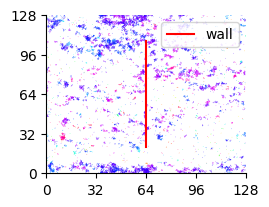

In [49]:
i = 3
simulations = reading_all(filenames, [], "test128", iteration=0)
positions = simulations[i]["final_positions"]
orientation = simulations[i]["final_orientations"]
wall_length = simulations[i]["wall length"]
x_wall = simulations[i]["L"]/2
wall_yMin = simulations[i]["L"]/2 - wall_length/2
wall_yMax = simulations[i]["L"]/2 + wall_length/2


# L = 128 # size of box
# rho = 1 # density
# N = int(rho * L**2) # number of particles
# positions = np.random.uniform(0, L, size = (N, 2))
# orientation = np.random.uniform(-np.pi, np.pi, size = N) 

# dir = str(os.getcwd())
# data = np.load(dir+"/finalstate.npz")
# positions = data["Positions"]
# orientation = data["Orientation"]
# wall_length = 0
# wall_yMin = 64 -wall_length/2
# wall_yMax = 64 +wall_length/2


fig,ax = plt.subplots(figsize = (fig_width/2+0.5,total_height/2+0.5))

qv = ax.quiver(positions[:,0], positions[:,1], np.cos(orientation), np.sin(orientation), orientation, clim = [-np.pi, np.pi], cmap = "hsv")

print(wall_length)
if wall_length != 0:
    ax = plot_x_wall(ax, x_wall, wall_yMin, wall_yMax, "red",walpha= 1)
    ax.legend(loc = "upper right")
ax.set_xticks([0,simulations[i]["L"]/4, simulations[i]["L"]/2, 3*simulations[i]["L"]/4, simulations[i]["L"]])
ax.set_yticks([0,simulations[i]["L"]/4, simulations[i]["L"]/2, 3*simulations[i]["L"]/4, simulations[i]["L"]])
ax.set_xlim(0, simulations[i]["L"])
ax.set_ylim(0, simulations[i]["L"])
plt.margins(0)  # Remove padding
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# cbar = fig.colorbar(qv, ax=ax)#, label="Orientation")
# cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.show()

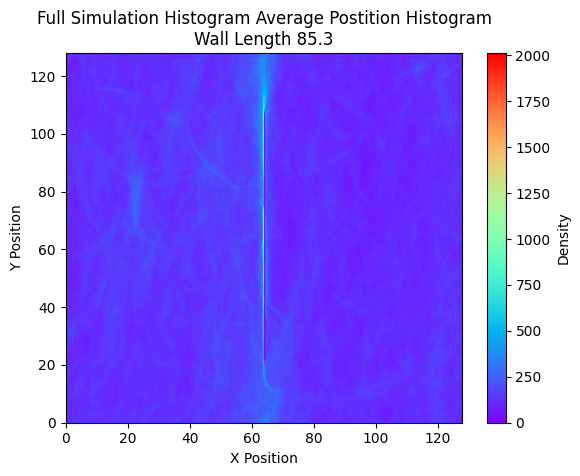

fSteady Phase Average Position Histogram
Wall Length 85.3


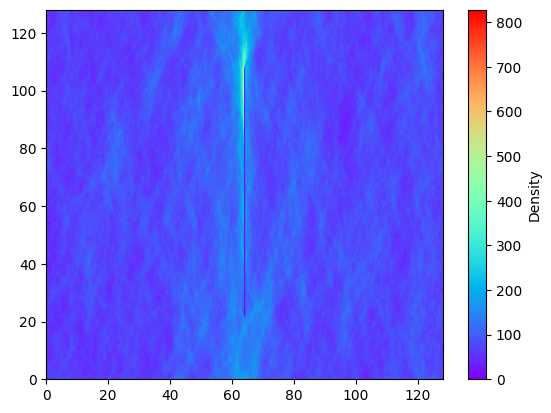

In [50]:
fig,ax = plt.subplots()

# simulations[i]["steady_histogram"] + simulations[i]["transient_histogram"]
nsteps = step_num = simulations[i]["steps"]
wall_length = simulations[i]["wall length"]

# Use imshow to display the normalized histogram
cax = ax.imshow((simulations[i]["steady_histogram"]+simulations[i]["transient_histogram"]).T, extent=[0, L, 0, L], origin='lower', cmap='rainbow', aspect='auto')

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title(f"Full Simulation Histogram Average Postition Histogram\nWall Length {wall_length:.1f}")

# Add a colorbar for reference
fig.colorbar(cax, ax=ax, label='Density')
fig.savefig(f"figures/Streamplot_Histogram_eta={eta}_rho={rho}_steps={nsteps}.png")
plt.show()

fig2,ax2 = plt.subplots()
_, ax2 = hist_2D_plot("steady", simulations[i], fig2, ax2, w_alpha=0, cmap="rainbow")
plt.show()

# Averaging on a new test

### Average alignment

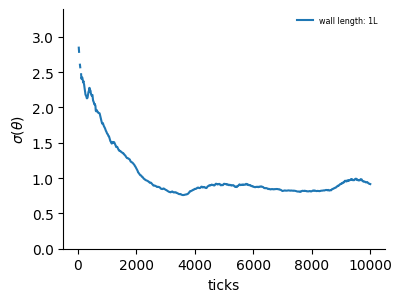

In [58]:
simulations = []

for i in range(6):
    # print(i)
    simulations = reading_all(filenames, simulations, "EDIT128", iteration=i)


text_width = 5.5
fig_width = text_width
fig_width = fig_width/2 + 1.4
fig_height = 0.75* fig_width 
total_height = 0.75*fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Dictionary to store std angles for each wall length
wall_std_dict = {}
wall_lengths = []
# Go through all three iterations
for iteration in [0,1,2,3,4,5]:
    for simulation in simulations[6*iteration:6*(1+iteration)]:
        wall_length = simulation["wall length"]
        steps = simulation["steps"]
        alignment_average_frames = simulation["alignment_average"]
        std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
        times = np.arange(0, steps + 1, alignment_average_frames)
        
        # Initialize list for this wall length if not exists
        if wall_length not in wall_std_dict:
            wall_std_dict[wall_length] = []
        
        # Append the std_angles for this iteration
        wall_std_dict[wall_length].append(std_angles)

# Now calculate average std for each wall length
lines = []
wall_lengths = []

from fractions import Fraction
for wall_length, std_list in wall_std_dict.items():
    
    # Convert to numpy array and calculate mean across iterations
    avg_std = np.mean(std_list, axis=0)
    
    # Convert wall_length to a fraction
    wall_label_fraction = Fraction(wall_length / 128.0).limit_denominator()
    wall_label = f"wall length: {wall_label_fraction}"
    
    line = ax.plot(times, avg_std, label=wall_label)[0]
    lines.append(line)
    
    wall_lengths.append(wall_length / 128.0)

# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {Fraction(wall_lengths[i]).limit_denominator()}L" for i in sorted_indices]


ax.legend(sorted_lines, sorted_labels, fontsize="xx-small", loc='upper right',frameon= False)
ax.set_xlabel("ticks")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel(r"$\sigma (\theta)$")
ax.set_ylim(0)

plt.show()

### Average histogram

1


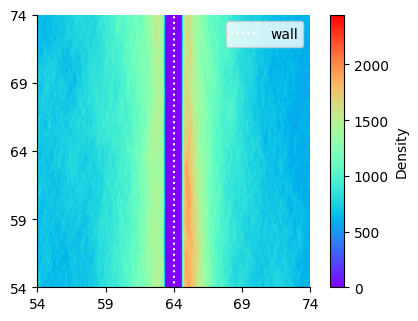

In [59]:
from collections import defaultdict

# Initialize a dictionary to store grouped data
grouped_data = defaultdict(lambda: {"sum_hist": [], "av_std_angles": [], "steps": None, "wall_length": None})

# Iterate through each simulation
for simulation in simulations:
    wall_length = simulation["wall length"]
    hist = simulation["steady_histogram"]
    angle_std = simulation["angle_std"]
    steps = simulation["steps"]
    
    # If this is the first time encountering this wall_length, initialize the data
    if grouped_data[wall_length]["steps"] is None:
        grouped_data[wall_length]["steps"] = steps
        grouped_data[wall_length]["wall_length"] = wall_length
        grouped_data[wall_length]["sum_hist"] = hist.copy()  # Initialize with a copy of the histogram
        grouped_data[wall_length]["av_std_angles"] = [angle_std]
    else:
        # Sum the histograms
        for i in range(len(hist)):
            grouped_data[wall_length]["sum_hist"][i] += hist[i]
        
        # Append the angle_std for averaging later
        grouped_data[wall_length]["av_std_angles"].append(angle_std)

# Convert the grouped data into the desired format
wall_dict_lst = []
for wall_length, data in grouped_data.items():
    # Calculate the average angle_std
    avg_angle_std = sum(data["av_std_angles"]) / len(data["av_std_angles"])
    
    # Append the final dictionary to the list
    wall_dict_lst.append({
        "wall length": data["wall_length"],
        "sum_hist": data["sum_hist"],
        "av_std_angles": avg_angle_std,
        "steps": data["steps"]
    })

L=128
fig, ax = plt.subplots(figsize=(fig_width*1.1, fig_width*0.8))
i = 0
cax = ax.imshow(wall_dict_lst[i]["sum_hist"].T, extent=[0,L,0,L], origin="lower", cmap='rainbow', aspect='auto')
fig.colorbar(cax, ax=ax, label='Density')

ax.set_aspect('equal')  # Ensure square aspect ratio

wall_length = wall_dict_lst[i]["wall length"]
amount = 10
upper_lim  = L/2 +amount
lower_lim  = L/2 - amount
ax.set_xlim(lower_lim,upper_lim)
ax.set_ylim(lower_lim,upper_lim)
# ax.set_xlim(60, 68)
ax.set_xticks(np.linspace(lower_lim,upper_lim,5))
ax.set_yticks(np.linspace(lower_lim,upper_lim,5))
ax.plot([64,64],[64-wall_length/2, 64+wall_length/2], linestyle = "dotted", label ="wall", color = "white",alpha = 1  )
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()
print(Fraction(wall_length/128).limit_denominator())
plt.tight_layout()
plt.show()



In [60]:
hist_shape = wall_dict_lst[i]["sum_hist"].shape
hist = wall_dict_lst[i]["sum_hist"]

max_index = np.unravel_index(np.argmax(hist), hist_shape)
x_pos = max_index[0]

x_max = x_pos/hist_shape[1]*128
x_dist = x_max-64
print(f"x position of maximum density: x = {x_max:.2f}\n" f"Distance away of: dx {x_dist:.2f}")

x position of maximum density: x = 62.96
Distance away of: dx -1.04
